In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

c:\Users\Ege\Documents\egemenkopuz\projects\inpainting-in-medical-imaging


# Preprocessing
---

## BraTS20


In [44]:
%run task.py --preprocess --config="configs/preprocessing/brats20.yml"

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   11.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   35.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   41.4s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   51.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.6min
[Parallel(

## BraTS18


In [45]:
%run task.py --preprocess --config="configs/preprocessing/brats18.yml"

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.3s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   42.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   49.7s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   59.6s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.3min
[Parallel(

# Creatings fixed indices for the datasets
---

Pre-created fixed indices are located in the folder `resources/indices`

In [5]:
import os
import yaml
from glob import glob
import numpy as np
from pathlib import Path
np.random.seed(42)

portions = {
    "75p": 75,
    "50p": 50,
    "25p": 25,
    "10p": 10,
    "5p": 5,
    "1p": 1,
}

dataset_info = {
    "brats20": (
        sorted(
            glob(
                os.path.join("resources/data/brats20/train", "*", "*", "t1",) + "/*.png"
            )
        ),
        sorted(
            glob(
                os.path.join("resources/data/brats20/validation", "*", "*", "t1",)
                + "/*.png"
            )
        ),
    ),
    "brats18": (
        sorted(
            glob(
                os.path.join("resources/data/brats18/train", "*", "*", "t1",) + "/*.png"
            )
        ),
        sorted(
            glob(
                os.path.join("resources/data/brats18/validation", "*", "*", "t1",)
                + "/*.png"
            )
        ),
    ),
}

print(
    f"Total samples in BraTS20: ({len(dataset_info['brats20'][0])}-{len(dataset_info['brats20'][1])})"
)
print(
    f"Total samples in BraTS18: ({len(dataset_info['brats18'][0])}-{len(dataset_info['brats18'][1])})"
)
print("Portions:")
for dataset_name, (t_dirs, v_dirs) in dataset_info.items():
    for portion_name, p in portions.items():
        t_all_ids = np.random.permutation(len(t_dirs))
        v_all_ids = np.random.permutation(len(v_dirs))
        t_split = int((len(t_dirs) * (p / 10)) // 10)
        v_split = int((len(v_dirs) * (p / 10)) // 10)
        t_ids, v_ids = sorted(t_all_ids[:t_split]), sorted(v_all_ids[:v_split])
        print(f"{dataset_name}-{portion_name}: ({len(t_ids)}-{len(v_ids)})")

        train_dirs = [
            os.path.normpath(dataset_info[dataset_name][0][x.item()]).split(os.sep)[4:]
            for x in t_ids
        ]
        val_dirs = [
            os.path.normpath(dataset_info[dataset_name][1][x.item()]).split(os.sep)[4:]
            for x in v_ids
        ]

        for i, dir in enumerate(train_dirs):
            train_dirs[i][2] = "*"
        for i, dir in enumerate(val_dirs):
            val_dirs[i][2] = "*"

        fixed_dirs = {
            "train": [os.path.join(*x,).replace("\\","/") for x in train_dirs],
            "val": [os.path.join(*x).replace("\\","/") for x in val_dirs],
        }
        with open(f"{dataset_name}_{portion_name}.yml", "w") as outfile:
            yaml.dump(
                fixed_dirs, outfile, default_flow_style=False,
            )



Total samples in BraTS20: (18744-2125)
Total samples in BraTS18: (14384-1703)
Portions:
brats20-75p: (14058-1593)
brats20-50p: (9372-1062)
brats20-25p: (4686-531)
brats20-10p: (1874-212)
brats20-5p: (937-106)
brats20-1p: (187-21)
brats18-75p: (10788-1277)
brats18-50p: (7192-851)
brats18-25p: (3596-425)
brats18-10p: (1438-170)
brats18-5p: (719-85)
brats18-1p: (143-17)


# Dataloader Test
---

In [51]:
from src.dataset.brats import BraTSDataset
from torch.utils.data import DataLoader
import torch
import torch.nn.functional as F
import yaml

# indices_path ="resources/indices/brats20_overfit.yml"
indices_path = None

if indices_path:
    with open(indices_path) as file:
        indices = yaml.safe_load(file)
else: 
    indices = {"train": None, "val": None}

dataset = BraTSDataset(root="resources/data/brats20/train", mode="train",fixed_indices=indices["train"])
train_loader = DataLoader(
    dataset=dataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=False
)

# device = (
#     torch.device(f"cuda:{torch.cuda.current_device()}")
#     if torch.cuda.is_available()
#     else "cpu"
# )

device = "cpu"


In [52]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import time

# 0.1581 seconds OLD
# 0.0472 seconds f5
# 0.0560 seconds almost all

total = 0
iter_n = 1
for _ in range(iter_n):
    tic = time.perf_counter()
    batch = next(iter(train_loader))
    toc = time.perf_counter()

    total += (toc - tic)
print(f"{total/iter_n:0.4f} seconds")

for k, v in batch.items():
    print(f">>> {k}: ")
    print(f"\t type: {str(v.type())}")
    print(f"\t shape: {tuple(v.shape)}")
    unique_vals = torch.unique(v).tolist()
    if len(unique_vals) < 10:
        print(f"\t unique values: {unique_vals}")


0.0646 seconds
>>> t1: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
>>> t1ce: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
>>> t2: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
>>> flair: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
>>> mask_brain_shape: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
	 unique values: [0.0, 1.0]
>>> mask_tumor_grade: 
	 type: torch.LongTensor
	 shape: (1, 1, 256, 256)
	 unique values: [0, 1, 2, 3]
>>> mask_tumor_shape: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
	 unique values: [0.0, 1.0]
>>> mask_net: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
	 unique values: [0.0, 1.0]
>>> mask_et: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
	 unique values: [0.0, 1.0]
>>> mask_ed: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
	 unique values: [0.0, 1.0]
>>> mask_circles: 
	 type: torch.FloatTensor
	 shape: (1, 1, 256, 256)
	 unique values: [0.0, 0.5, 0.75, 1.0]


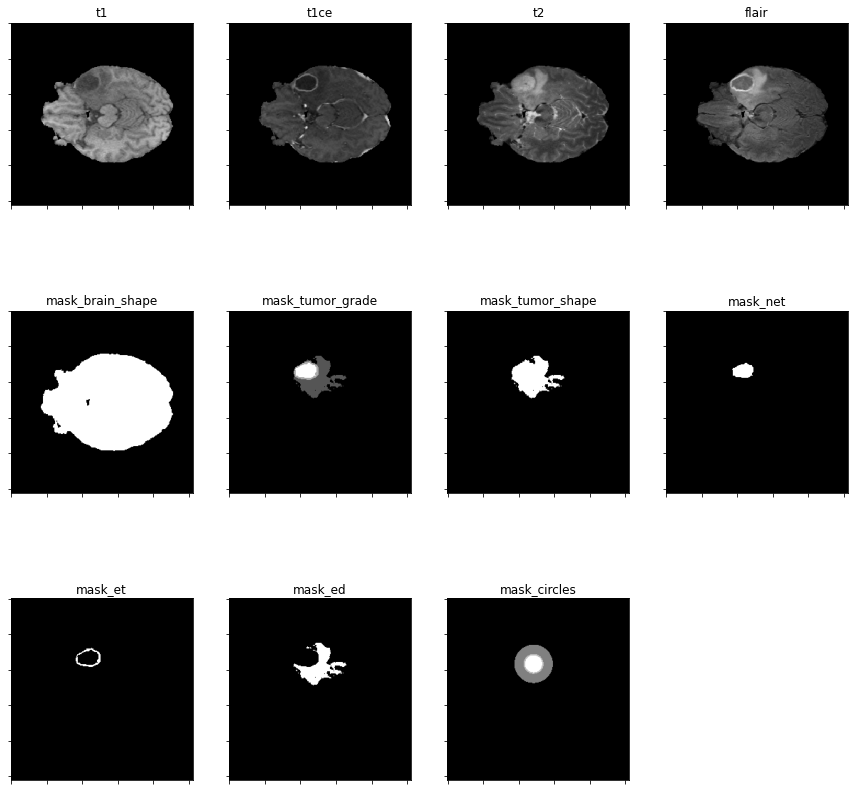

In [64]:
import matplotlib.pyplot as plt
import numpy as np

sample = dataset[10]

fig = plt.figure(figsize=(15, 15))

iter_n = 1
for k, v in sample.items():
    ax = fig.add_subplot(3, 4, iter_n)
    ax.set_title(k)
    if k in ["mask_tumor_grade"]:
        ax.imshow(np.squeeze(v), cmap="gray", vmax=3, vmin=0)
    else:
        ax.imshow(np.squeeze(v), cmap="gray", vmax=1, vmin=0)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    iter_n += 1